# Twiter Sentiment Analysis

In [28]:
## Import dependencies

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from nltk.stem.porter import PorterStemmer
import nltk
import re
from wordcloud import WordCloud

## Load Dataset


In [2]:
df=pd.read_csv("Twitter-Sentiments.csv")
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [5]:
## No null values in the dataset


## Preprocessing the dataset

In [6]:
# clean the data
# remove @ from the starting of the tweets 
def clean_data(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for word in r:
        input_txt=re.sub(word,"",input_txt)
    return input_txt

In [7]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [8]:
df['clean_tweet']=np.vectorize(clean_data)(df['tweet'],"@[\w]*")

In [9]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [10]:
## replace special characters with space
df['clean_tweet']=df['clean_tweet'].str.replace('[^a-zA-Z#]'," ")

In [11]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [12]:
## remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't cause they don't off...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: society #motivation


In [13]:
## Individual words considered as token
tokenized_tweet=df['clean_tweet'].apply(lambda x:x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, can't, cause, they, do...
2                              [bihday, your, majesty]
3    [#model, love, take, with, time, urð±!!!, ð...
4                  [factsguide:, society, #motivation]
Name: clean_tweet, dtype: object

In [14]:
stemmer=PorterStemmer()

tokenized_tweet=tokenized_tweet.apply(lambda setence:[stemmer.stem(word) for word in setence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, can't, caus, they, don'...
2                              [bihday, your, majesti]
3    [#model, love, take, with, time, urð±!!!, ð...
4                       [factsguide:, societi, #motiv]
Name: clean_tweet, dtype: object

In [15]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=" ".join(tokenized_tweet[i])
df['clean_tweet']=tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't caus they don't offer...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time urð±!!! ððð...
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv


# Build World cloud


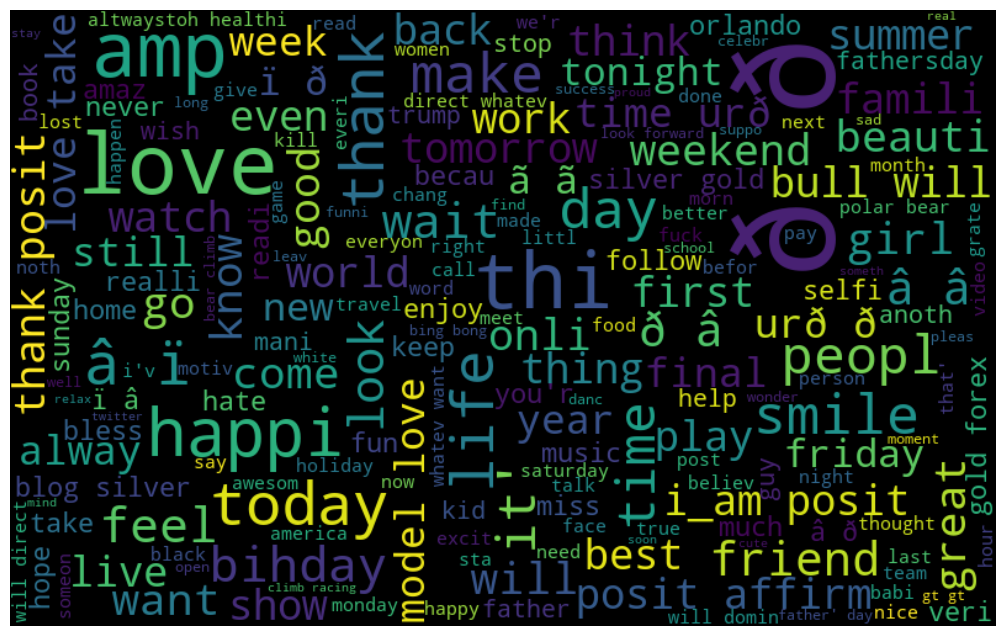

In [16]:
all_words=" ".join([text for text in df['clean_tweet']])
wordcloud=WordCloud(width=800,height=500,random_state=2,max_font_size=110).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

(-0.5, 799.5, 499.5, -0.5)

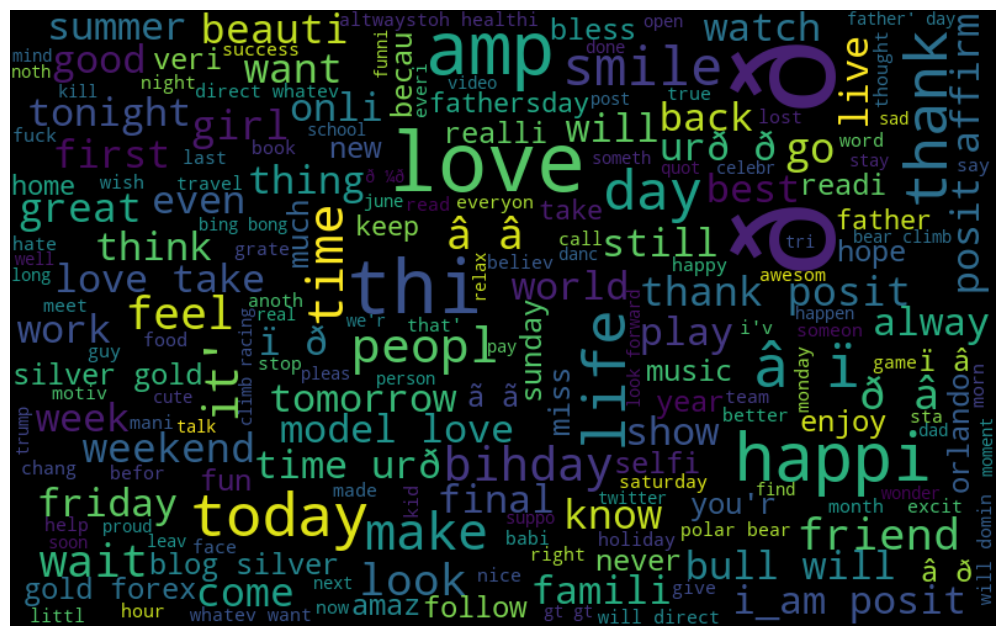

In [18]:
# Words in positive tweets
all_words=" ".join([text for text in df['clean_tweet'][df['label']==0]])
wordcloud=WordCloud(width=800,height=500,random_state=2,max_font_size=110).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 799.5, 499.5, -0.5)

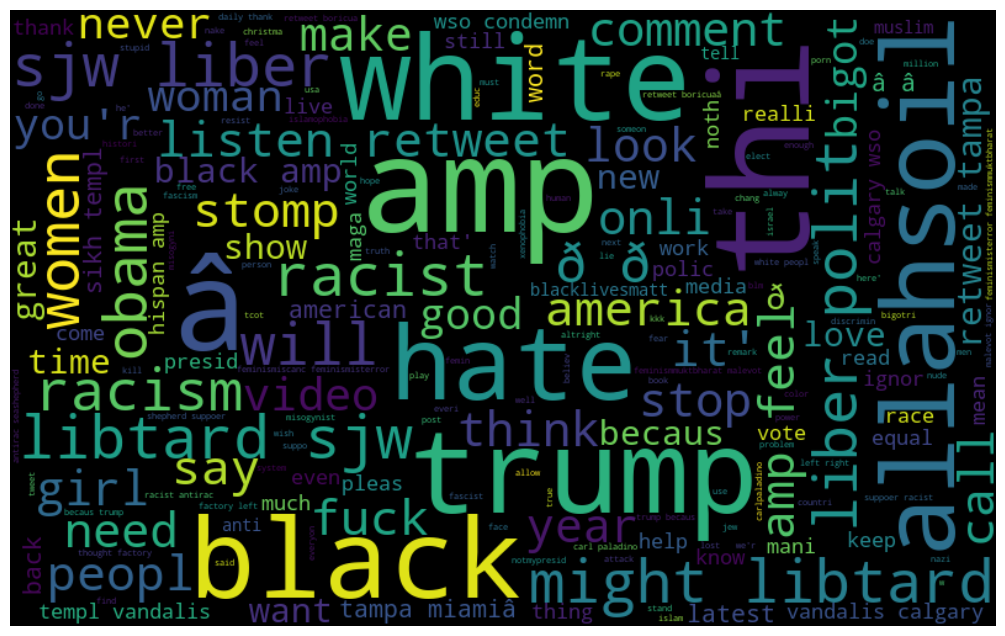

In [19]:
# words in negative tweets
all_words=" ".join([text for text in df['clean_tweet'][df['label']==1]])
wordcloud=WordCloud(width=800,height=500,random_state=2,max_font_size=110).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


In [20]:
# Extracting hashtags from tweets
def extract_hastag(tweets):
    hastag=[]
    for tweet in tweets:
        ht=re.findall(r'#(\w+)',tweet)
        hastag.append(ht)
    return hastag

In [21]:
# extract hastags from postive tweets
ht_positive=extract_hastag(df['clean_tweet'][df['label']==0])

#extract hastags from negative tweets
ht_negative=extract_hastag(df['clean_tweet'][df['label']==1])


In [22]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [23]:
ht_negative[:5]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia']]

In [24]:
# unnesting list
ht_positive=sum(ht_positive,[])
ht_negative=sum(ht_negative,[])

In [25]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [26]:
ht_negative[:5]

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay']

In [29]:
freq=nltk.FreqDist(ht_positive)
d=pd.DataFrame({
    'Hashtag':list(freq.keys()),
    'Count':list(freq.values())
})
d.head()

,Hashtag,Count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374


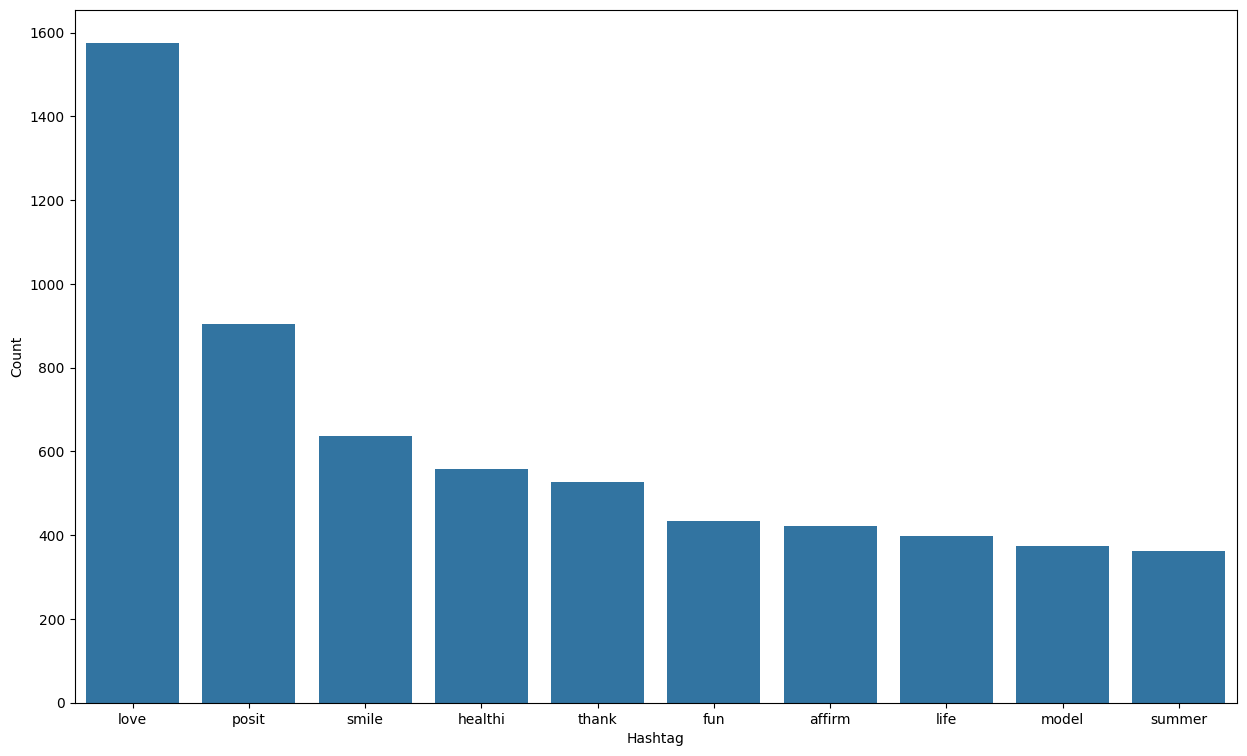

In [31]:
# top 10 freq words
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [36]:
freq=nltk.FreqDist(ht_negative)
d=pd.DataFrame({
    'Hashtag':list(freq.keys()),
    'Count':list(freq.values())
})
d.head()

,Hashtag,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2


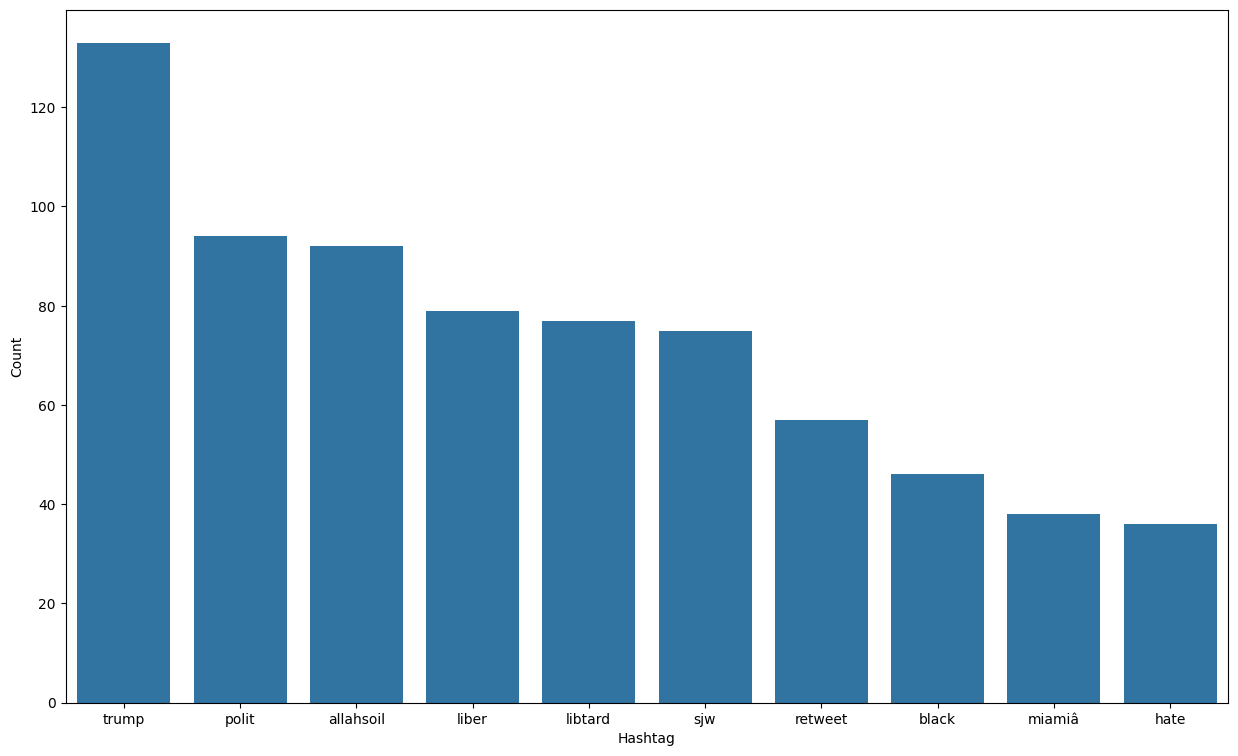

In [37]:
# top 10 freq words
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

# Input split

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score

In [39]:
bow_vectorizer=CountVectorizer(max_df=0.9,min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(df['clean_tweet'])

In [42]:
X_train,X_test,y_train,y_test=train_test_split(bow,df['label'],random_state=42,test_size=0.25)

## Model training

In [44]:

model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [45]:
y_pred=model.predict(X_test)
f1_score(y_test,y_pred)

0.506508875739645

In [46]:
accuracy_score(y_test,y_pred)

0.9478162933299963

## Prediction System

In [54]:
input_tweet="you are trump"
input_tweet=clean_data(input_tweet,"@[\w]*")
input_tweet=input_tweet.replace('[^a-zA-Z#]'," ")
input_tweet=input_tweet.split()
input_tweet=[stemmer.stem(word) for word in input_tweet]
input_tweet=" ".join(input_tweet)
input_tweet=bow_vectorizer.transform([input_tweet])
prediction=model.predict(input_tweet)
prediction[0]

0